# EXPLORE AND CLUSTER THE NEIGHBORHOODS IN TORONTO

In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
import folium

In [54]:
neighborhoods = pd.read_csv('toronto_postal_code_lat_lng.csv')
neighborhoods.head(100)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7545,-79.3300
1,M4A,North York,Victoria Village,43.7276,-79.3148
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.6662,-79.5282
6,M1B,Scarborough,"Malvern, Rouge",43.8113,-79.1930
7,M3B,North York,Don Mills,43.7450,-79.3590
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.7063,-79.3094
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3783


### VISUALIZE THE MAP OF TORONTO WITH NEIGHBORHOODS

In [3]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [4]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

map_toronto

### REQUEST VENUE DATA FROM FOURSQUARE

In [5]:
#libraries for import foursquare data
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [6]:
CLIENT_ID = 'CCQ0BSRTCITLL3JTUOD0KUY5SKRDHG4PQCJZXLR4G2ZF1ESN' # your Foursquare ID
CLIENT_SECRET = 'AKUH5NRMDS5ZXXVQ3SRN322UP0UC02CEB3NEZCREGDHXBDSI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CCQ0BSRTCITLL3JTUOD0KUY5SKRDHG4PQCJZXLR4G2ZF1ESN
CLIENT_SECRET:AKUH5NRMDS5ZXXVQ3SRN322UP0UC02CEB3NEZCREGDHXBDSI


In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude',                   
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
toronto_venues = getNearbyVenues(neighborhoods['Neighbourhood'], neighborhoods['Latitude'], neighborhoods['Longitude'], radius=500)

In [51]:
print(toronto_venues.shape)
toronto_venues.head()

(2171, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.7545,-79.3300,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.7545,-79.3300,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.7276,-79.3148,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.7276,-79.3148,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.7276,-79.3148,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [10]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",7,7,7,7,7,7
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
Berczy Park,96,96,96,96,96,96
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",39,39,39,39,39,39
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",14,14,14,14,14,14


In [11]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 261 uniques categories.


In [12]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Alderwood, Long Branch",0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bayview Village,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Bedford Park, Lawrence Manor East",0.000000,0.000000,0.0000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
5,Berczy Park,0.010417,0.000000,0.0000,0.000000,0.000000,0.010417,0.020833,0.000000,0.000000,...,0.000000,0.010417,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Birch Cliff, Cliffside West",0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.025641,0.0000,0.000000,0.000000,0.000000,0.025641,0.000000,0.025641,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,"Business reply mail Processing Centre, South C...",0.071429,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.017544,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000


### MOST COMMON VENUE FOR EACH NEIGHBORHOOD

In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [15]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Breakfast Spot,Skating Rink,Badminton Court,Latin American Restaurant,Fish Market,Flea Market,Fish & Chips Shop,Field,Fast Food Restaurant,Donut Shop
1,"Alderwood, Long Branch",Coffee Shop,Pharmacy,Convenience Store,Pizza Place,Sandwich Place,Gym,Pub,Athletics & Sports,Women's Store,Doner Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Fried Chicken Joint,Coffee Shop,Pizza Place,Mediterranean Restaurant,Middle Eastern Restaurant,Deli / Bodega,Grocery Store,Eastern European Restaurant,Electronics Store,Escape Room
3,Bayview Village,Golf Driving Range,Park,Gas Station,Trail,Women's Store,Escape Room,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Women's Store,Thai Restaurant,Comfort Food Restaurant,Cupcake Shop,Pharmacy,Pizza Place,Pub


### ELBOW METHOD TO DETERMINE THE RIGHT K FOR K-MEANS

*I decided to include in the cluster analysis all the neighborhoods of Toronto.*

In [16]:
import numpy as np
from sklearn.cluster import KMeans

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
sum_squarred_distances = []
K = []

for i in range(1, 50):

    kclusters = i
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
    sum_squarred_distances.append(kmeans.inertia_)
    K.append(i)

In [17]:
import matplotlib.pyplot as plt

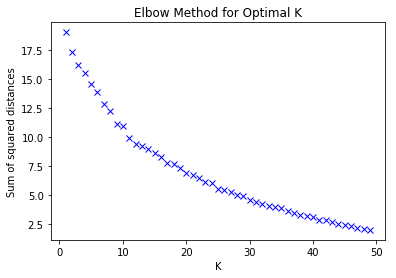

In [18]:
plt.plot(K, sum_squarred_distances, 'bx')
plt.title('Elbow Method for Optimal K') 
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.show()

*It's not a good graph for Elbow Method. It's not clear what K is the best. I choose K = 15*

In [33]:
kclusters = 15
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_[0:10] 

array([6, 0, 6, 2, 6, 6, 2, 6, 6, 6])

### DATAFRAME WITH CLUSTERS

In [20]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = neighborhoods

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!


,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.7545,-79.3300,1.0,Food & Drink Shop,Park,Dog Run,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
1,M4A,North York,Victoria Village,43.7276,-79.3148,6.0,Hockey Arena,French Restaurant,Intersection,Coffee Shop,Portuguese Restaurant,Pizza Place,Park,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626,6.0,Coffee Shop,Breakfast Spot,Restaurant,Yoga Studio,Theater,Food Truck,Spa,Event Space,Beer Store,Electronics Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504,6.0,Clothing Store,Coffee Shop,Cosmetics Shop,Women's Store,Restaurant,Toy / Game Store,Sandwich Place,Sushi Restaurant,Bakery,Men's Store
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889,6.0,Sushi Restaurant,Italian Restaurant,Burrito Place,Theater,Beer Bar,Ramen Restaurant,Escape Room,Portuguese Restaurant,Ethiopian Restaurant,Japanese Restaurant


In [31]:
toronto_merged.dropna(inplace = True)
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int) 
toronto_merged.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.7545,-79.3300,1,Food & Drink Shop,Park,Dog Run,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
1,M4A,North York,Victoria Village,43.7276,-79.3148,6,Hockey Arena,French Restaurant,Intersection,Coffee Shop,Portuguese Restaurant,Pizza Place,Park,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626,6,Coffee Shop,Breakfast Spot,Restaurant,Yoga Studio,Theater,Food Truck,Spa,Event Space,Beer Store,Electronics Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504,6,Clothing Store,Coffee Shop,Cosmetics Shop,Women's Store,Restaurant,Toy / Game Store,Sandwich Place,Sushi Restaurant,Bakery,Men's Store
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889,6,Sushi Restaurant,Italian Restaurant,Burrito Place,Theater,Beer Bar,Ramen Restaurant,Escape Room,Portuguese Restaurant,Ethiopian Restaurant,Japanese Restaurant


### MAP OF THE CLUSTERS

In [32]:
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### RESULT ANALYSIS

*THERE ARE MANY CLUSTERS. SO I DECIDED TO DO THE ANALYSIS ONLY OF THE FIRST 5 CLUSTERS SORTED BY NUMBER OF NEIGHBORHOODS*

In [49]:
unique, counts = np.unique(np.sort(kmeans.labels_), return_counts=True)
x = dict(zip(unique, counts))
{k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse= True)}

{6: 52,
 0: 12,
 2: 10,
 14: 6,
 1: 3,
 9: 2,
 13: 2,
 3: 1,
 4: 1,
 5: 1,
 7: 1,
 8: 1,
 10: 1,
 11: 1,
 12: 1}

#### CLUSTER 6 - NEGHBORHOODS: 52

In [55]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,6,Hockey Arena,French Restaurant,Intersection,Coffee Shop,Portuguese Restaurant,Pizza Place,Park,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,"Regent Park, Harbourfront",6,Coffee Shop,Breakfast Spot,Restaurant,Yoga Studio,Theater,Food Truck,Spa,Event Space,Beer Store,Electronics Store
3,"Lawrence Manor, Lawrence Heights",6,Clothing Store,Coffee Shop,Cosmetics Shop,Women's Store,Restaurant,Toy / Game Store,Sandwich Place,Sushi Restaurant,Bakery,Men's Store
4,"Queen's Park, Ontario Provincial Government",6,Sushi Restaurant,Italian Restaurant,Burrito Place,Theater,Beer Bar,Ramen Restaurant,Escape Room,Portuguese Restaurant,Ethiopian Restaurant,Japanese Restaurant
9,"Garden District, Ryerson",6,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Japanese Restaurant,Hotel,Middle Eastern Restaurant,Diner,Ramen Restaurant,Fast Food Restaurant
10,Glencairn,6,Bakery,Ice Cream Shop,Fish Market,Japanese Restaurant,Latin American Restaurant,Grocery Store,Fast Food Restaurant,Mediterranean Restaurant,Pizza Place,Gas Station
14,Woodbine Heights,6,Spa,Video Store,Beer Store,Convenience Store,Flea Market,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Doner Restaurant
15,St. James Town,6,Coffee Shop,Café,Seafood Restaurant,Cocktail Bar,American Restaurant,Italian Restaurant,Cosmetics Shop,Department Store,Restaurant,Cheese Shop
17,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",6,Pet Store,Coffee Shop,Pharmacy,Convenience Store,Pizza Place,Liquor Store,Café,Shopping Plaza,Beer Store,Eastern European Restaurant
19,The Beaches,6,Pub,Cheese Shop,Trail,Health Food Store,Gastropub,Bakery,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store


#### CLUSTER 0 - NEGHBORHOODS: 12

In [56]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Islington Avenue, Humber Valley Village",0,Pharmacy,Home Service,Park,Skating Rink,Bank,Grocery Store,Women's Store,Escape Room,Doner Restaurant,Donut Shop
8,"Parkview Hill, Woodbine Gardens",0,Pizza Place,Breakfast Spot,Intersection,Pharmacy,Café,Flea Market,Gastropub,Bank,Pet Store,Gym / Fitness Center
11,"West Deane Park, Princess Gardens, Martin Grov...",0,Pizza Place,Construction & Landscaping,Coffee Shop,Chinese Restaurant,Sandwich Place,Tea Room,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store
18,"Guildwood, Morningside, West Hill",0,Pizza Place,Restaurant,Bank,Fast Food Restaurant,Greek Restaurant,Pharmacy,Mexican Restaurant,Fried Chicken Joint,Supermarket,Beer Store
34,"Northwood Park, York University",0,Pizza Place,Sports Bar,Massage Studio,Sandwich Place,Middle Eastern Restaurant,Women's Store,Ethiopian Restaurant,Eastern European Restaurant,Electronics Store,Escape Room
51,"Cliffside, Cliffcrest, Scarborough Village West",0,Ice Cream Shop,Pharmacy,Gift Shop,Sandwich Place,Coffee Shop,Bistro,Liquor Store,Pizza Place,Farmers Market,Falafel Restaurant
70,Westmount,0,Flea Market,Ice Cream Shop,Supermarket,Middle Eastern Restaurant,Sandwich Place,Chinese Restaurant,Coffee Shop,Discount Store,Pizza Place,Curling Ice
76,"Kingsview Village, St. Phillips, Martin Grove ...",0,Chinese Restaurant,American Restaurant,Gas Station,Beer Store,Supermarket,Pizza Place,Sandwich Place,Bus Line,Pharmacy,Bank
81,"Clarks Corners, Tam O'Shanter, Sullivan",0,Pharmacy,Pizza Place,Fried Chicken Joint,Chinese Restaurant,Gas Station,Thai Restaurant,Italian Restaurant,Intersection,Bank,Fast Food Restaurant
88,"South Steeles, Silverstone, Humbergate, Jamest...",0,Grocery Store,Pharmacy,Sandwich Place,Beer Store,Fried Chicken Joint,Caribbean Restaurant,Hardware Store,Pizza Place,Fast Food Restaurant,Falafel Restaurant


#### CLUSTER 2 - NEGHBORHOODS: 10

In [57]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Humewood-Cedarvale,2,Hockey Arena,Park,Playground,Field,Deli / Bodega,Grocery Store,Trail,Ethiopian Restaurant,Donut Shop,Eastern European Restaurant
21,Caledonia-Fairbanks,2,Park,Women's Store,Sporting Goods Shop,Mexican Restaurant,Beer Store,Gym,Bakery,Fast Food Restaurant,Farmers Market,Falafel Restaurant
25,Christie,2,Café,Grocery Store,Athletics & Sports,Candy Store,Baby Store,Coffee Shop,Park,Playground,Falafel Restaurant,Event Space
26,Cedarbrae,2,Lounge,Gaming Cafe,Women's Store,Doner Restaurant,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant
31,"Dufferin, Dovercourt Village",2,Park,Bakery,Bar,Pizza Place,Smoke Shop,Café,Middle Eastern Restaurant,Furniture / Home Store,Bank,Pool
32,Scarborough Village,2,Spa,Park,Grocery Store,Event Space,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Falafel Restaurant
36,"Harbourfront East, Union Station, Toronto Islands",2,Park,Music Venue,Café,Harbor / Marina,Women's Store,Ethiopian Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room
39,Bayview Village,2,Golf Driving Range,Park,Gas Station,Trail,Women's Store,Escape Room,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
58,"Birch Cliff, Cliffside West",2,General Entertainment,Café,College Stadium,Skating Rink,Ethiopian Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Women's Store
82,"Moore Park, Summerhill East",2,Tennis Court,Gym,Thai Restaurant,Trail,Grocery Store,Park,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


#### CLUSTER 14 - NEGHBORHOODS: 6

In [58]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 14, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Don Mills,14,Park,Pool,Trail,Home Service,River,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store
13,Don Mills,14,Park,Pool,Trail,Home Service,River,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store
35,"East Toronto, Broadview North (Old East York)",14,Intersection,Convenience Store,Park,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Farmers Market
64,Weston,14,Convenience Store,Jewelry Store,Women's Store,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Farmers Market
66,York Mills West,14,Construction & Landscaping,Convenience Store,Park,Event Space,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Farmers Market
68,"Forest Hill North & West, Forest Hill Road Park",14,Home Service,Park,Trail,Women's Store,Event Space,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant
100,"Old Mill South, King's Mill Park, Sunnylea, Hu...",14,Convenience Store,Home Service,Baseball Field,Park,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space


#### CLUSTER 1 - NEGHBORHOODS: 3

In [60]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,1,Food & Drink Shop,Park,Dog Run,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
27,Hillcrest Village,1,Residential Building (Apartment / Condo),Park,Women's Store,Event Space,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Falafel Restaurant
61,Lawrence Park,1,Photography Studio,Park,Falafel Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Farmers Market
